In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = ["2Mu2E_100GeV_5GeV_400mm"]

fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["looseBarrelE", "barrelE", "looseEndcapE", "endcapE"]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  looseEndcapE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  looseEndcapE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  looseEndcapE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  looseEndcapE
Not applying any cuts to the l

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

                             ┌───────────────────────────────────────────────┐
[     -inf,         0) 0     │                                               │
[        0, 0.0002167) 112.3 │██████████████████████████████████████████████ │
[0.0002167, 0.0004333) 91.22 │█████████████████████████████████████▍         │
[0.0004333,   0.00065) 93.73 │██████████████████████████████████████▍        │
[  0.00065, 0.0008667) 58.32 │███████████████████████▉                       │
[0.0008667,  0.001083) 74.31 │██████████████████████████████▍                │
[ 0.001083,    0.0013) 64.12 │██████████████████████████▎                    │
[   0.0013,  0.001517) 33.4  │█████████████▋                                 │
[ 0.001517,  0.001733) 40.14 │████████████████▍                              │
[ 0.001733,   0.00195) 18.99 │███████▊                                       │
[  0.00195,  0.002167) 13.24 │█████▍                                         │
[ 0.002167,  0.002383) 5.958 │██▌                   

Hist(Regular(30, 0, 0.0065, name='electron_GsfEleDEtaInSeedCut'), storage=Weight()) # Sum: WeightedSum(value=632.081, variance=1304.52)

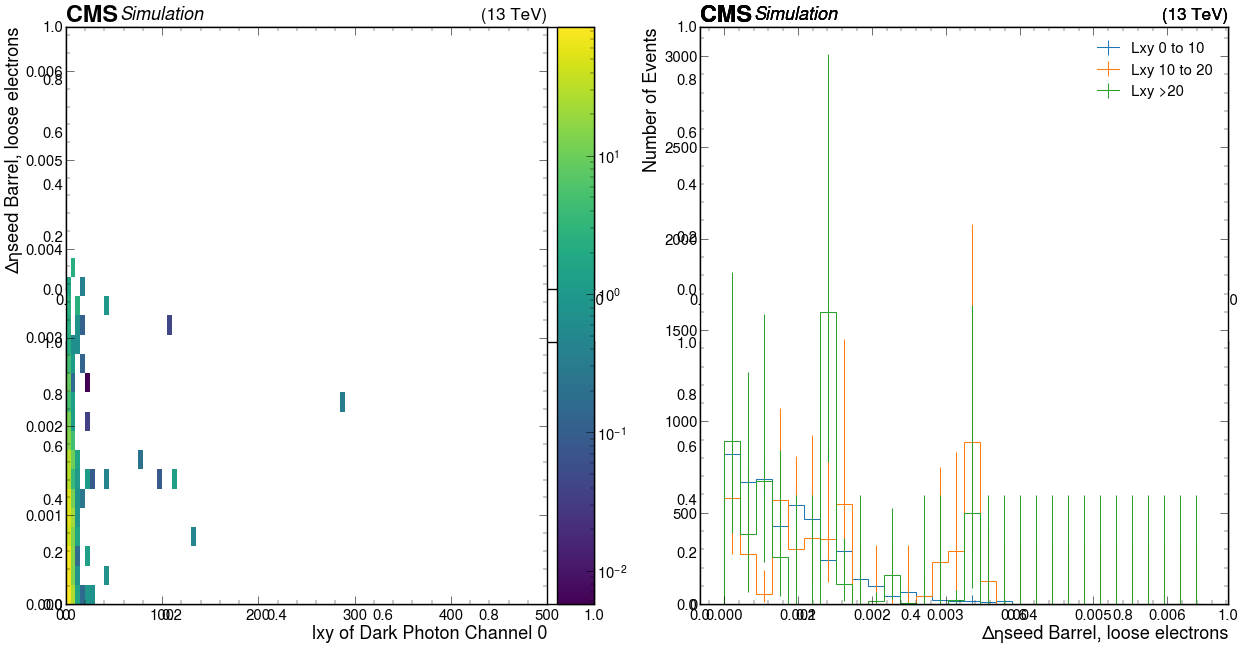

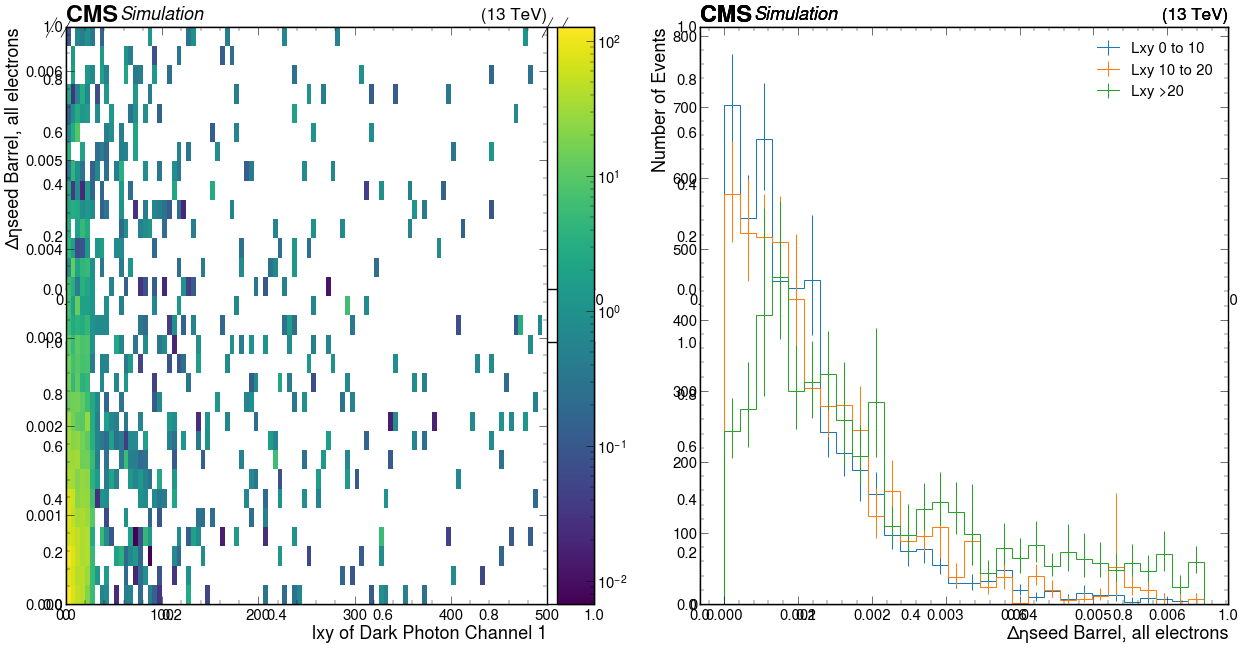

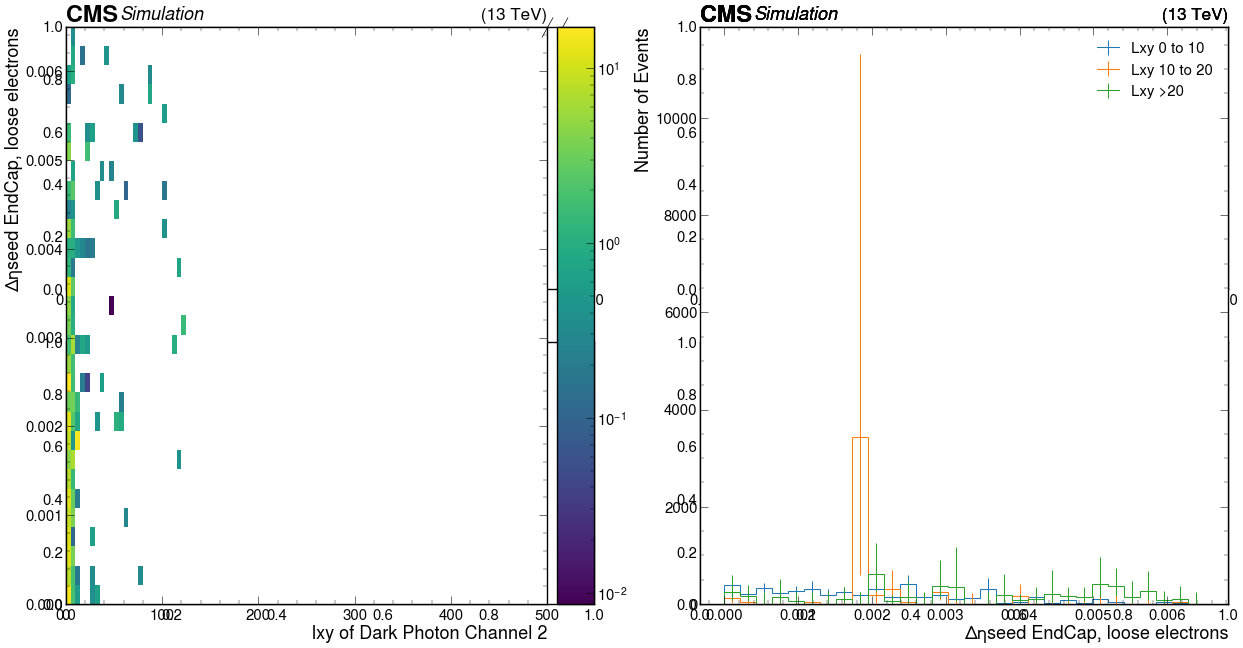

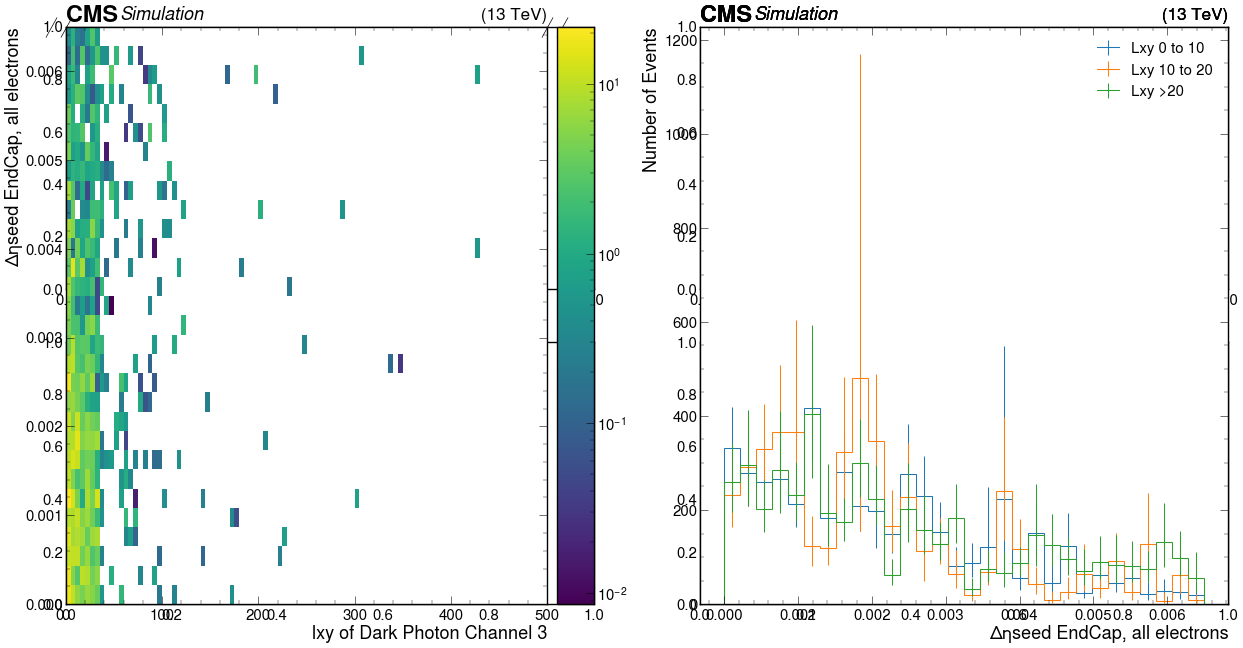

In [6]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:17]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:17]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Δηseed EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:17]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Δηseed EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(0, 2, sum),:17]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed EndCap, all electrons")


(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:])

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

                            ┌────────────────────────────────────────────────┐
[    -inf,        0) 0      │                                                │
[       0, 0.001286) 175.1  │███████████████████████████████████████████████ │
[0.001286, 0.002571) 126.2  │█████████████████████████████████▉              │
[0.002571, 0.003857) 54.57  │██████████████▋                                 │
[0.003857, 0.005143) 42.3   │███████████▍                                    │
[0.005143, 0.006429) 36.75  │█████████▉                                      │
[0.006429, 0.007714) 30.41  │████████▏                                       │
[0.007714,    0.009) 50.73  │█████████████▋                                  │
[   0.009,  0.01029) 19.67  │█████▎                                          │
[ 0.01029,  0.01157) 11.08  │███                                             │
[ 0.01157,  0.01286) 11.22  │███                                             │
[ 0.01286,  0.01414) 9.245  │██▌                    

Hist(Regular(35, 0, 0.045, name='electron_GsfEleDPhiInCut'), storage=Weight()) # Sum: WeightedSum(value=626.77, variance=1300.37) (WeightedSum(value=632.081, variance=1304.52) with flow)

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


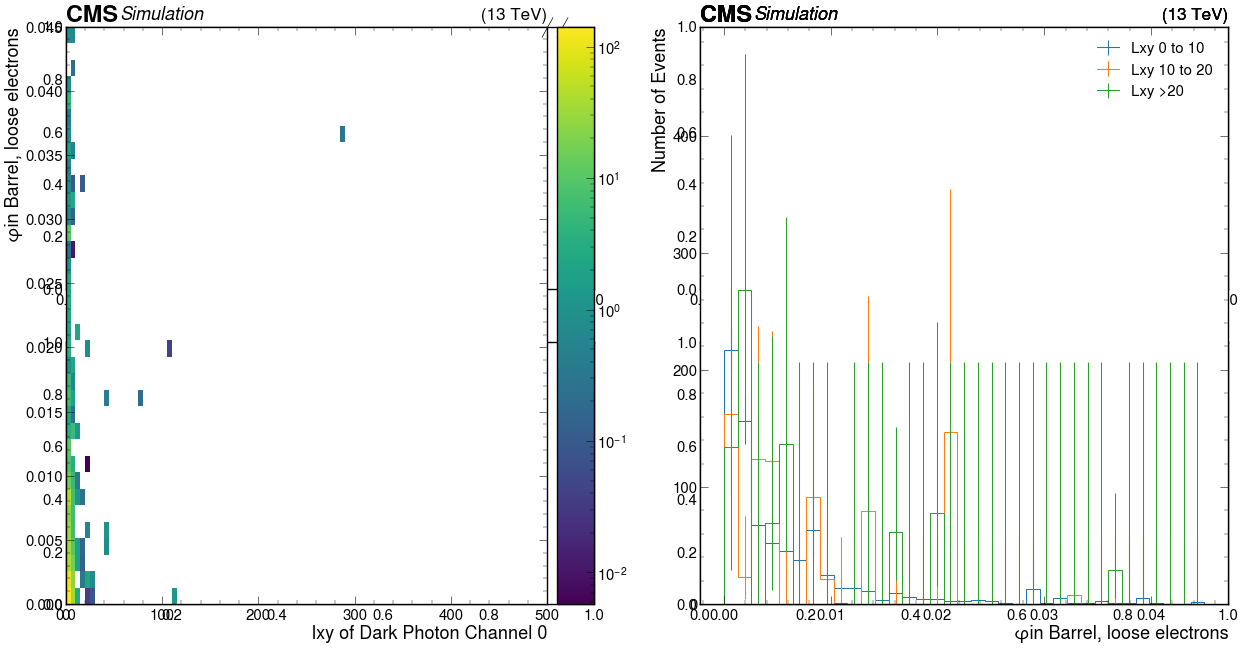

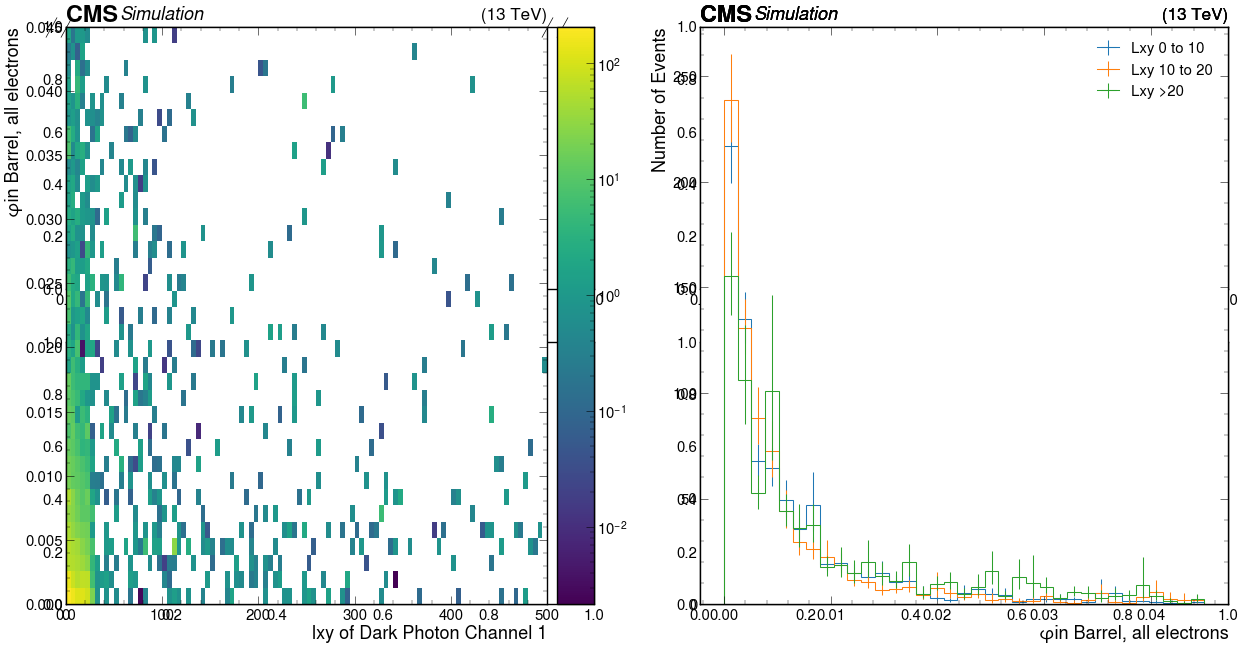

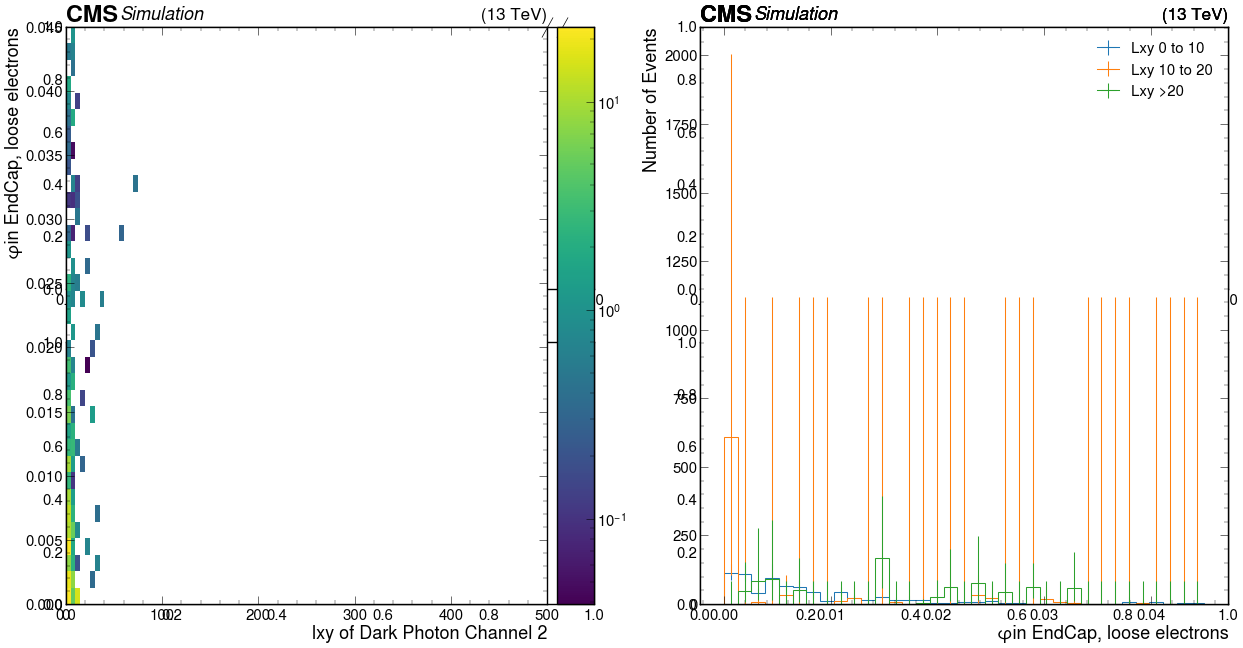

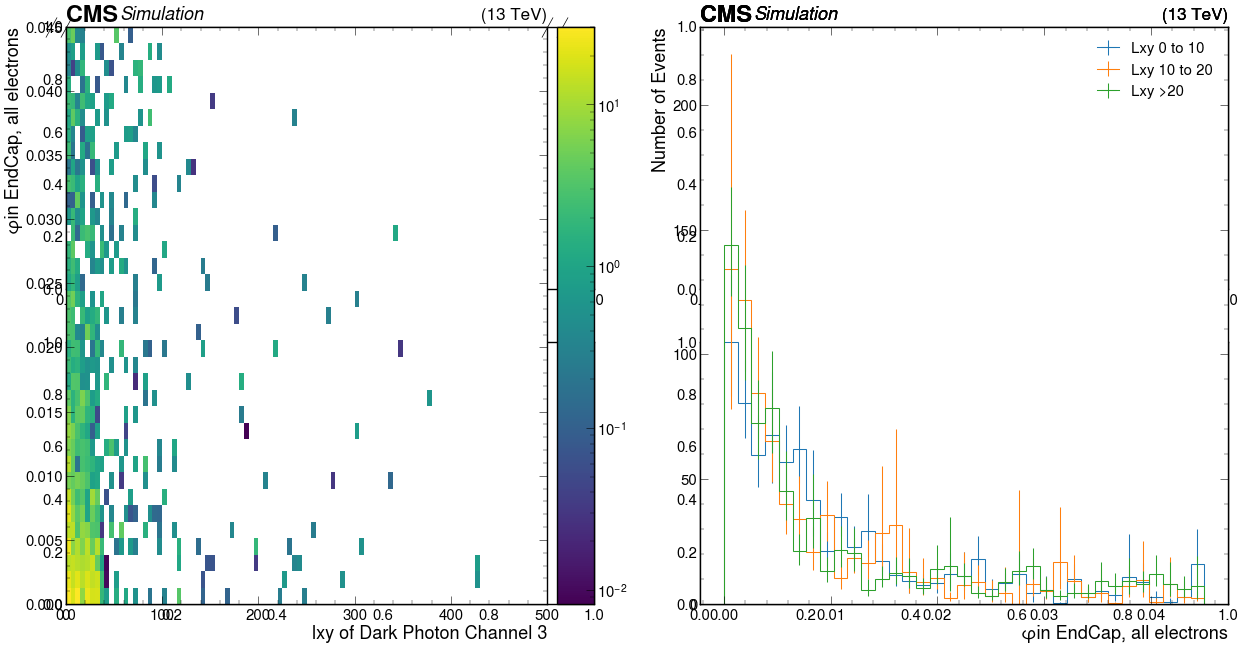

In [7]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("∆φin Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
print(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:32]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("∆φin Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:32]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("∆φin EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(0, 2, sum),:32]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("∆φin EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(0, 2, sum),:32]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin EndCap, all electrons")


(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:])

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

                             ┌───────────────────────────────────────────────┐
[    -inf,        0) 0       │                                               │
[       0, 0.006667) 563.6   │██████████████████████████████████████████████ │
[0.006667,  0.01333) 33.15   │██▊                                            │
[ 0.01333,     0.02) 11.37   │▉                                              │
[    0.02,  0.02667) 1.764   │▏                                              │
[ 0.02667,  0.03333) 3.65    │▎                                              │
[ 0.03333,     0.04) 5.25    │▍                                              │
[    0.04,  0.04667) 11.51   │█                                              │
[ 0.04667,  0.05333) 0.05156 │                                               │
[ 0.05333,     0.06) 0.7035  │                                               │
[    0.06,  0.06667) 0       │                                               │
[ 0.06667,  0.07333) 0       │                      

Hist(Regular(45, 0, 0.3, name='electron_GsfEleEInverseMinusPInverseCut'), storage=Weight()) # Sum: WeightedSum(value=632.081, variance=1304.52)

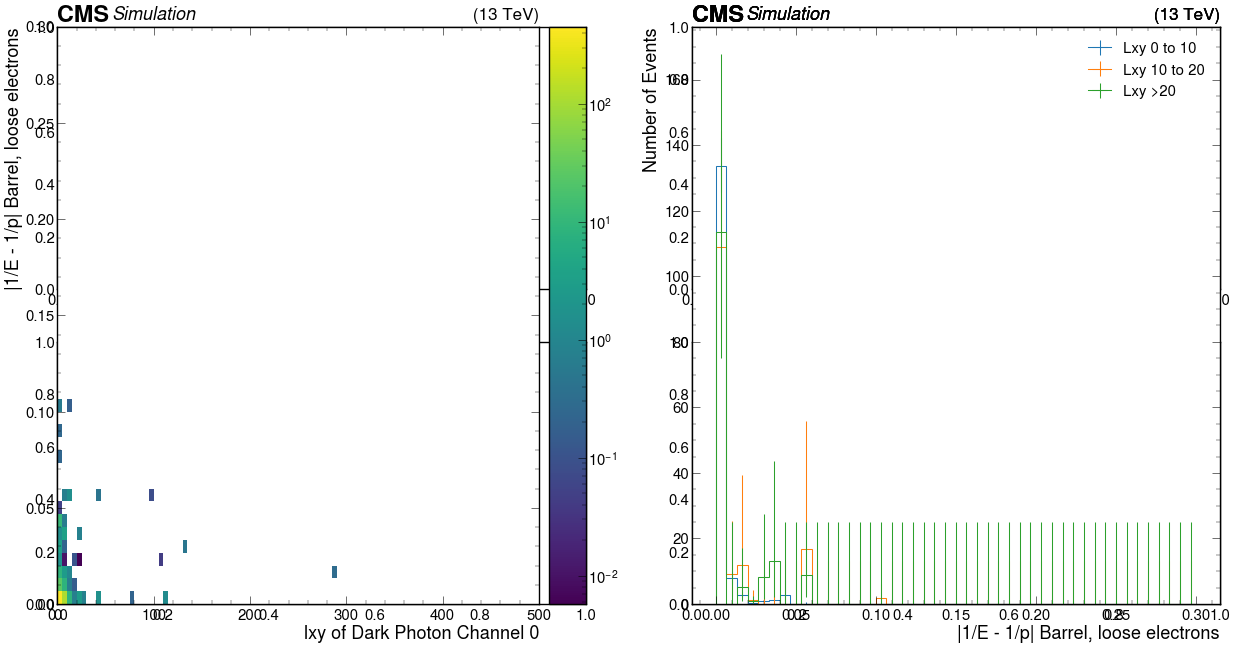

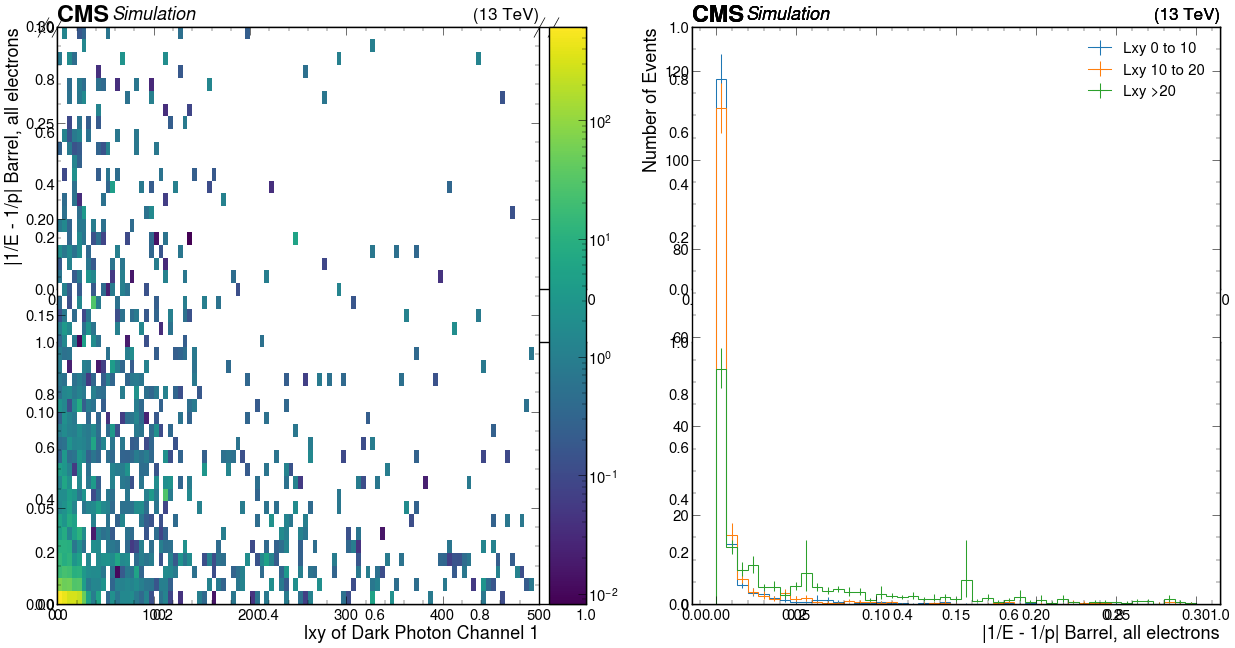

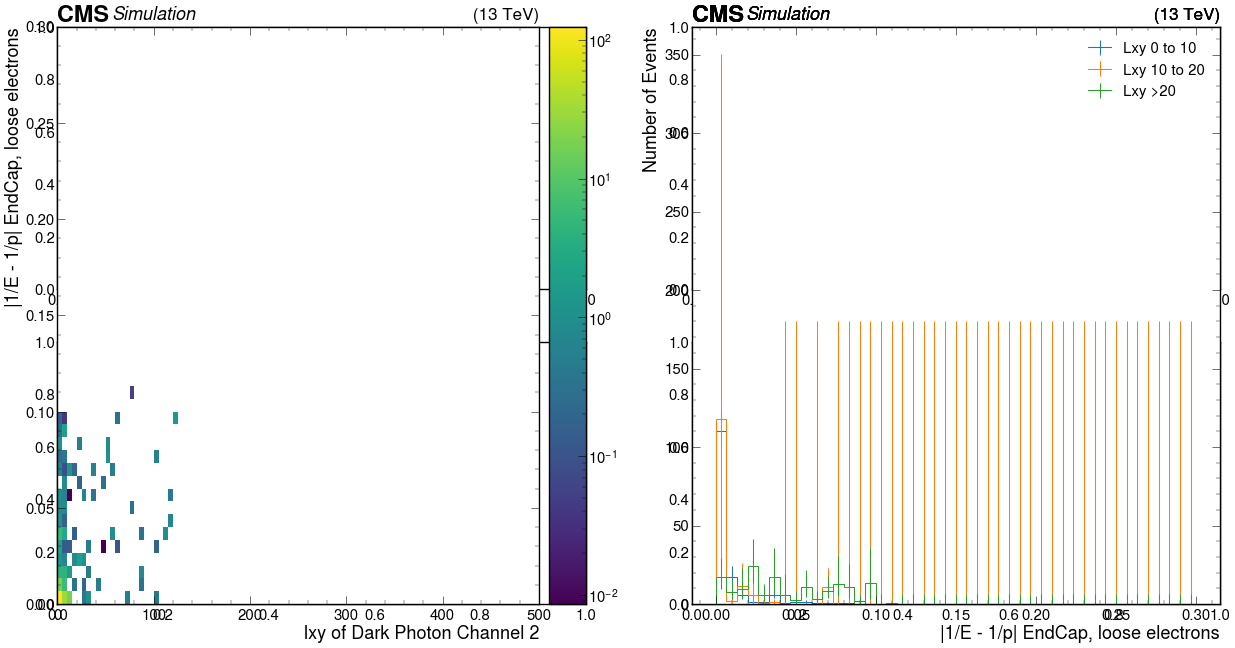

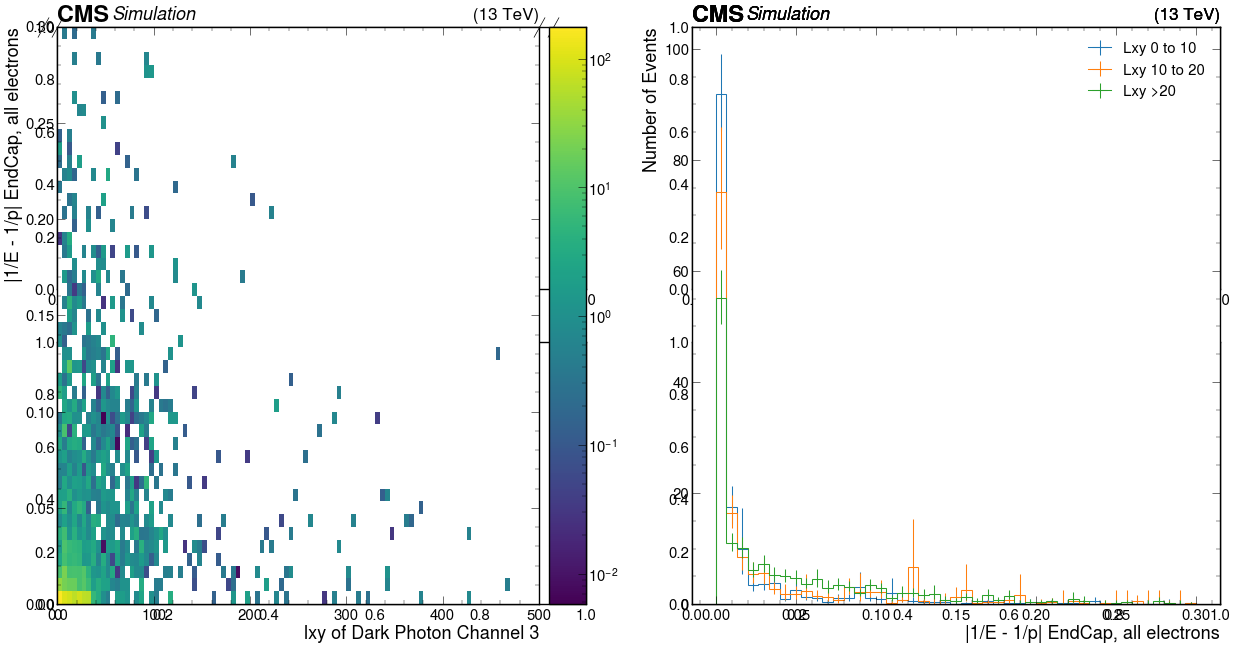

In [8]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:25]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:25]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("|1/E - 1/p| EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:25]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("|1/E - 1/p| EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(0, 2, sum),:25]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| EndCap, all electrons")


(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:])

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

Text(0, 1, 'Isolation')

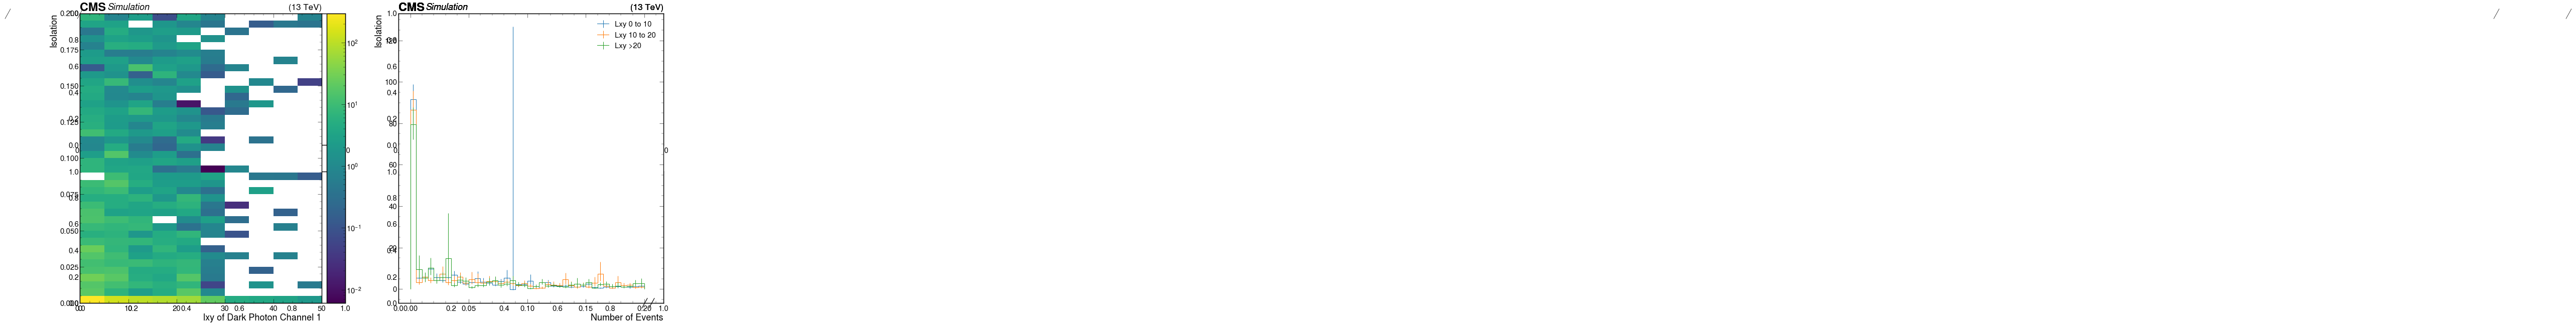

In [9]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                           ┌─────────────────────────────────────────────────┐
[    -inf,        0) 0     │                                                 │
[       0, 0.001286) 299.7 │████████████████████████████████████████████████ │
[0.001286, 0.002571) 1.695 │▎                                                │
[0.002571, 0.003857) 3.351 │▌                                                │
[0.003857, 0.005143) 3.216 │▌                                                │
[0.005143, 0.006429) 1.548 │▎                                                │
[0.006429, 0.007714) 5.35  │▉                                                │
[0.007714,    0.009) 10.36 │█▋                                               │
[   0.009,  0.01029) 6.192 │█                                                │
[ 0.01029,  0.01157) 7.276 │█▏                                               │
[ 0.01157,  0.01286) 4.45  │▊                                                │
[ 0.01286,  0.01414) 13.03 │██▏                     

Hist(Regular(35, 0, 0.045, name='electron_GsfEleFull5x5SigmaIEtaIEtaCut'), storage=Weight()) # Sum: WeightedSum(value=499.688, variance=1086.35) (WeightedSum(value=632.081, variance=1304.52) with flow)

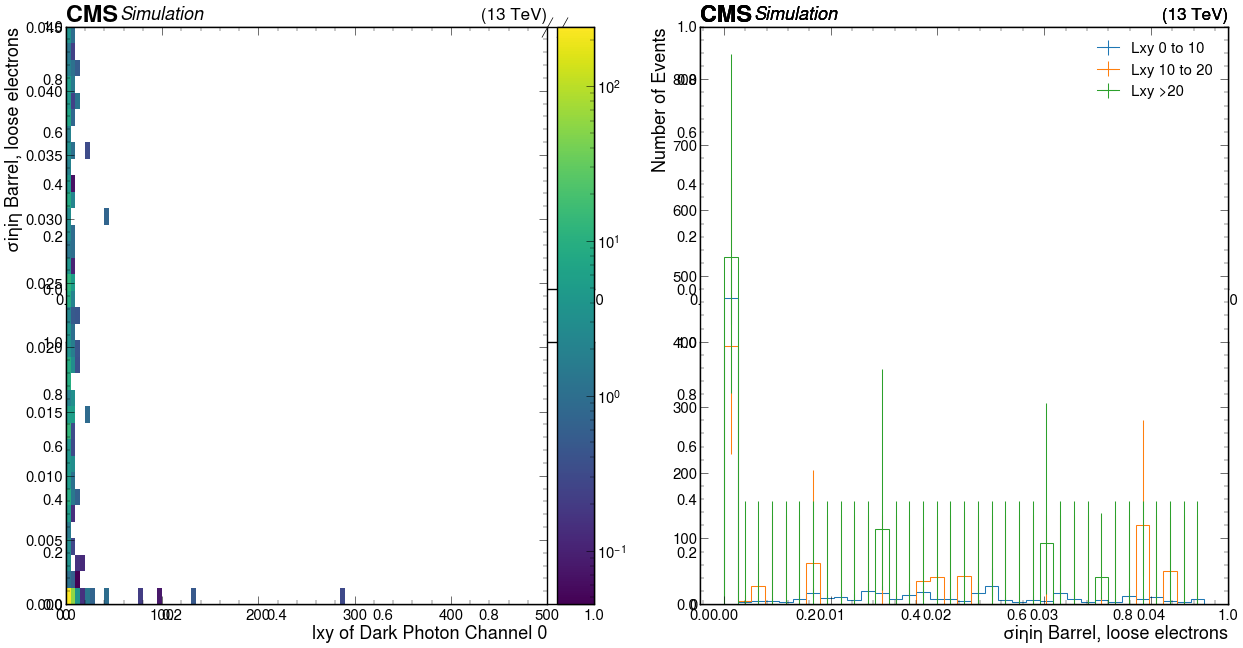

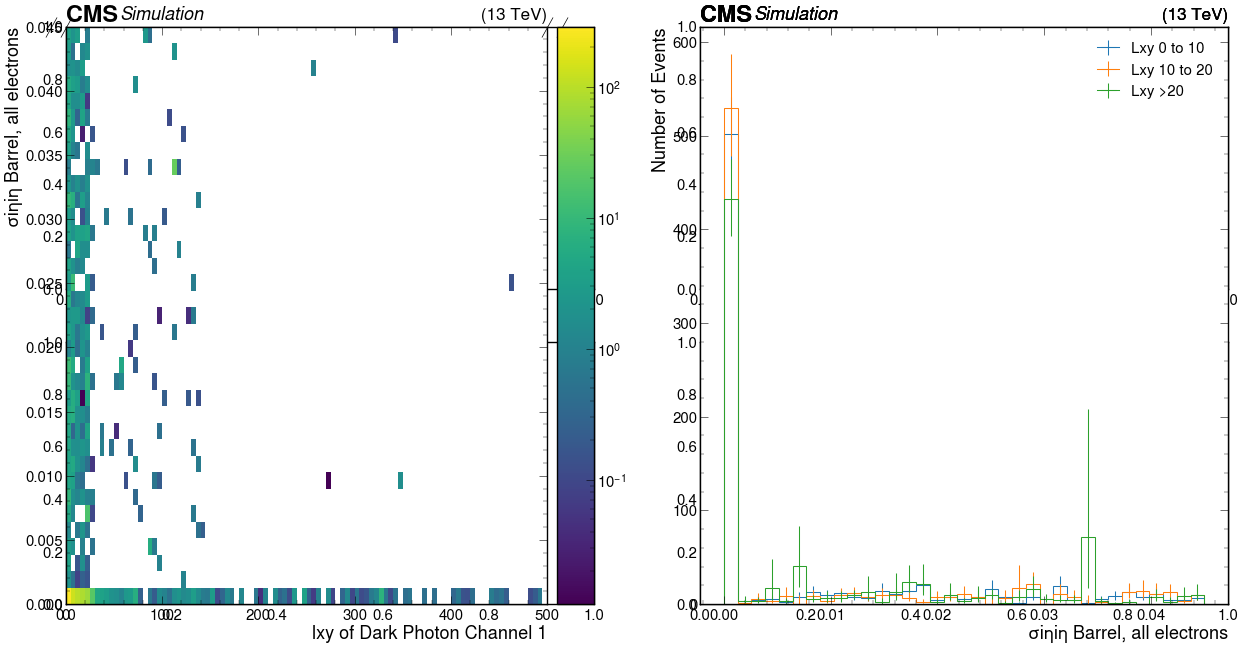

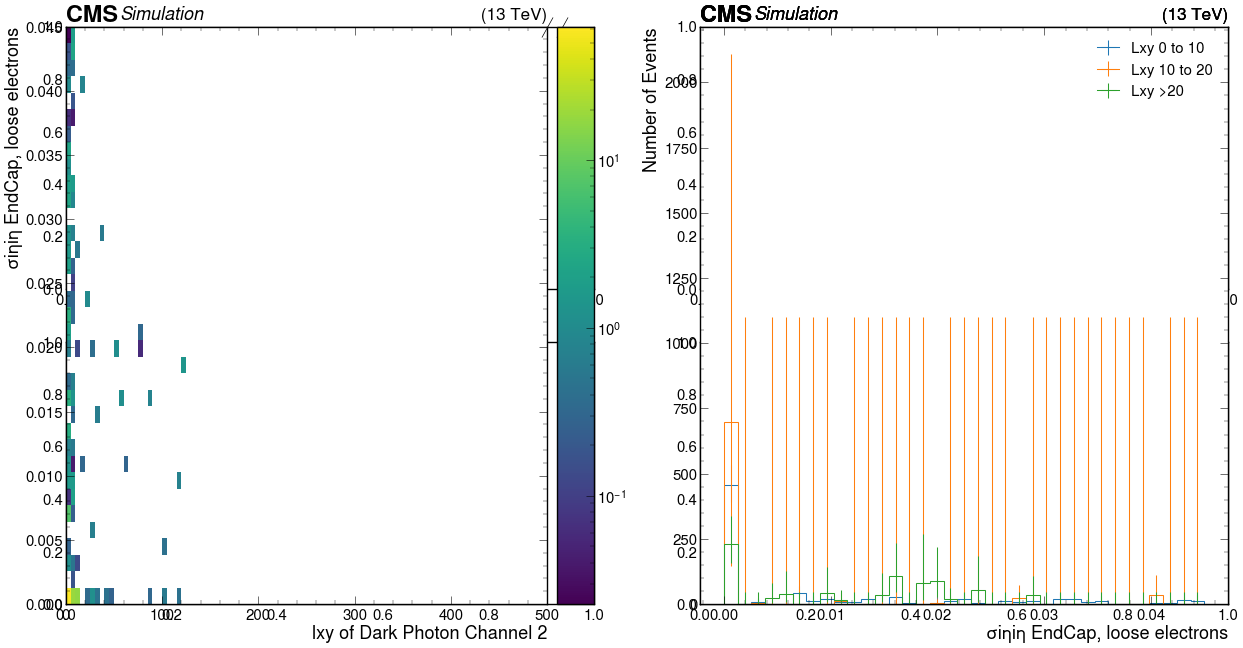

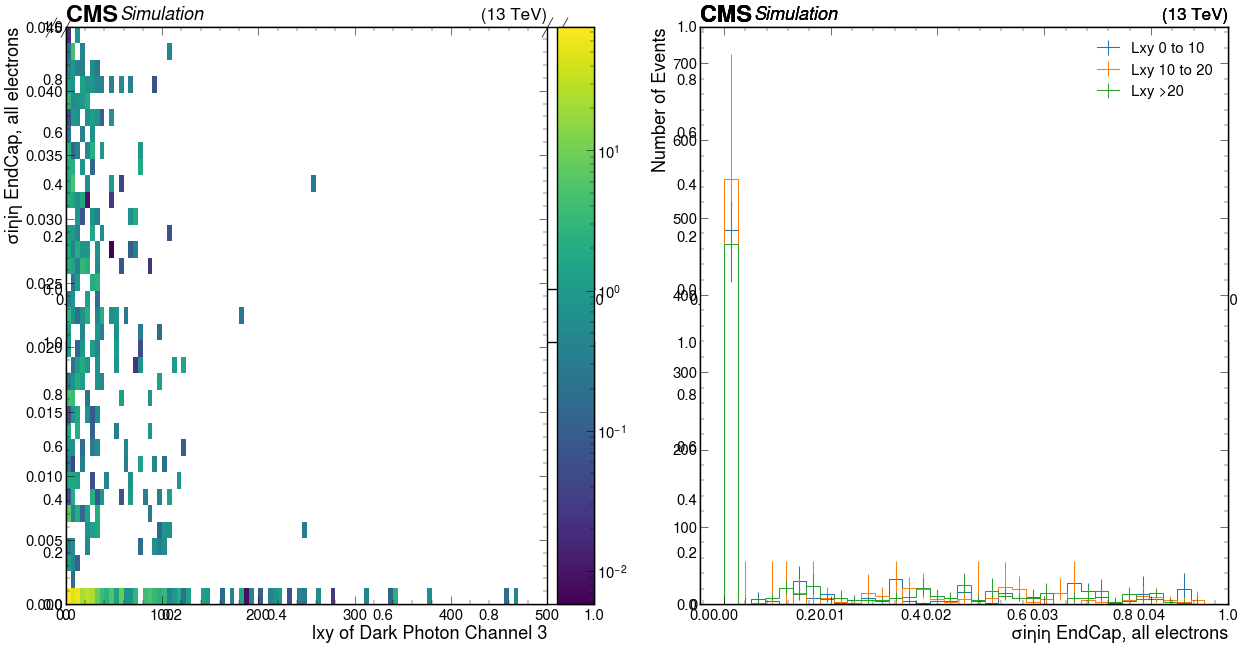

In [10]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:13]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:13]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("σiηiη EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(0, 2, sum),:13]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("σiηiη EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:13]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη EndCap, all electrons")


(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:])

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 0     │                                                          │
[   1, inf) 632.1 │█████████████████████████████████████████████████████████ │
                  └──────────────────────────────────────────────────────────┘
                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 3.488 │▏                                                         │
[   1, inf) 1371  │█████████████████████████████████████████████████████████ │
                  └──────────────────────────────────────────────────────────┘
                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 0     │                                 

Hist(Regular(2, 0, 2, name='electron_GsfEleConversionVetoCut'), storage=Weight()) # Sum: WeightedSum(value=632.081, variance=1304.52)

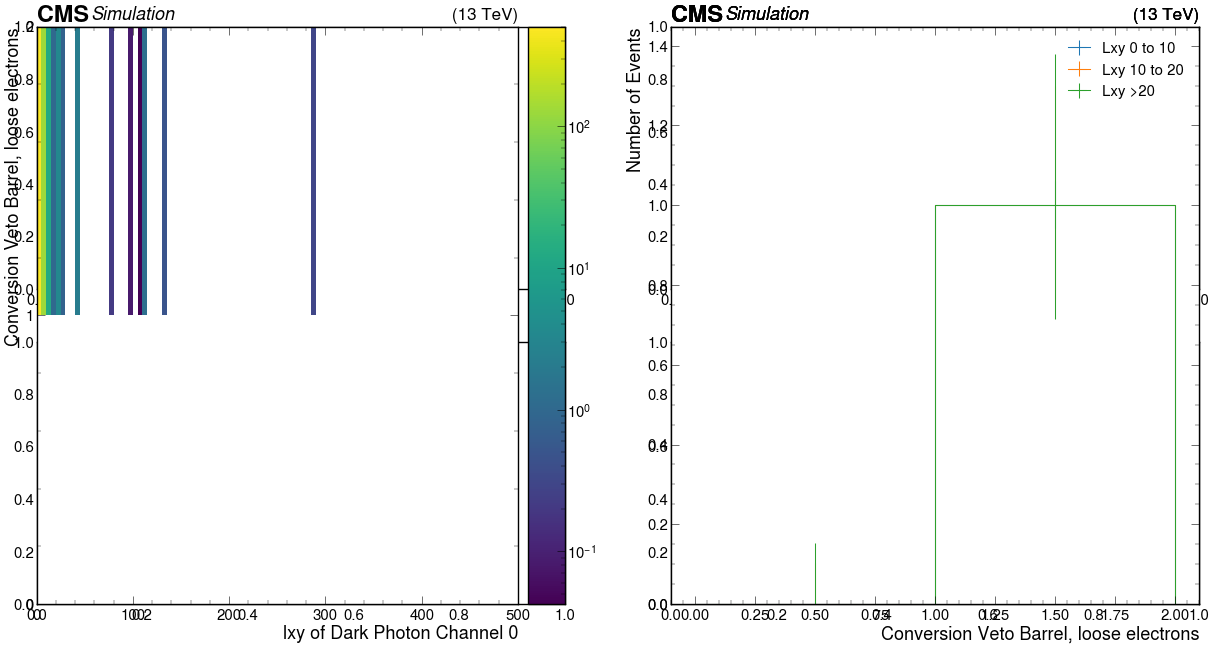

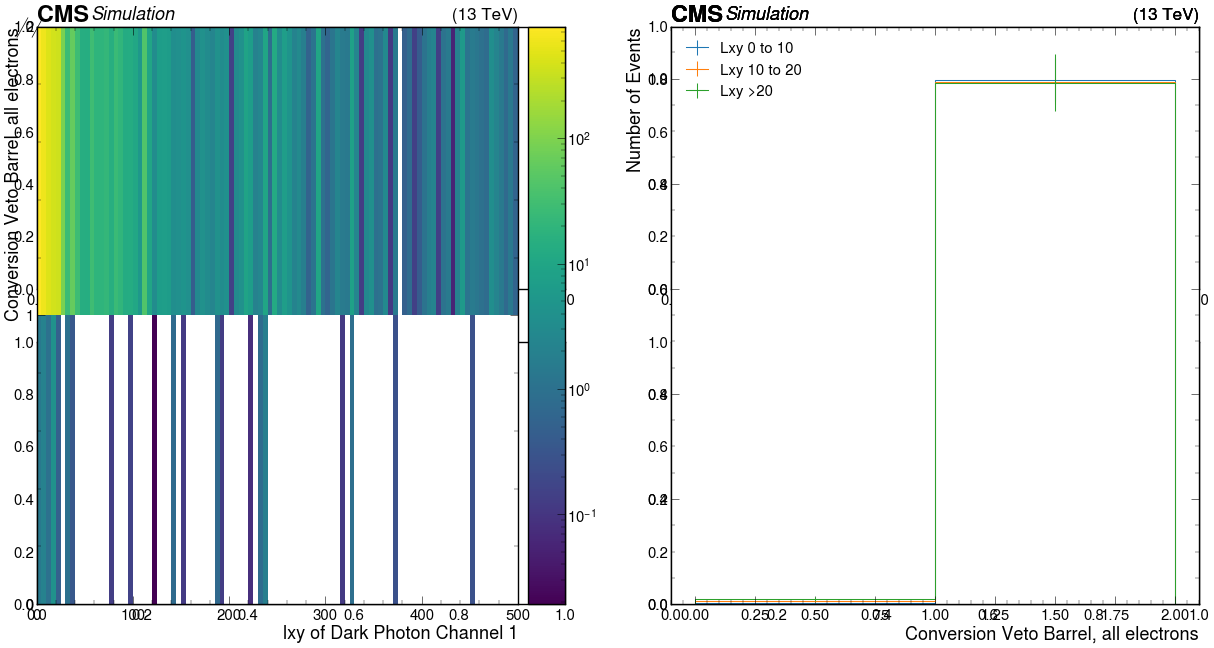

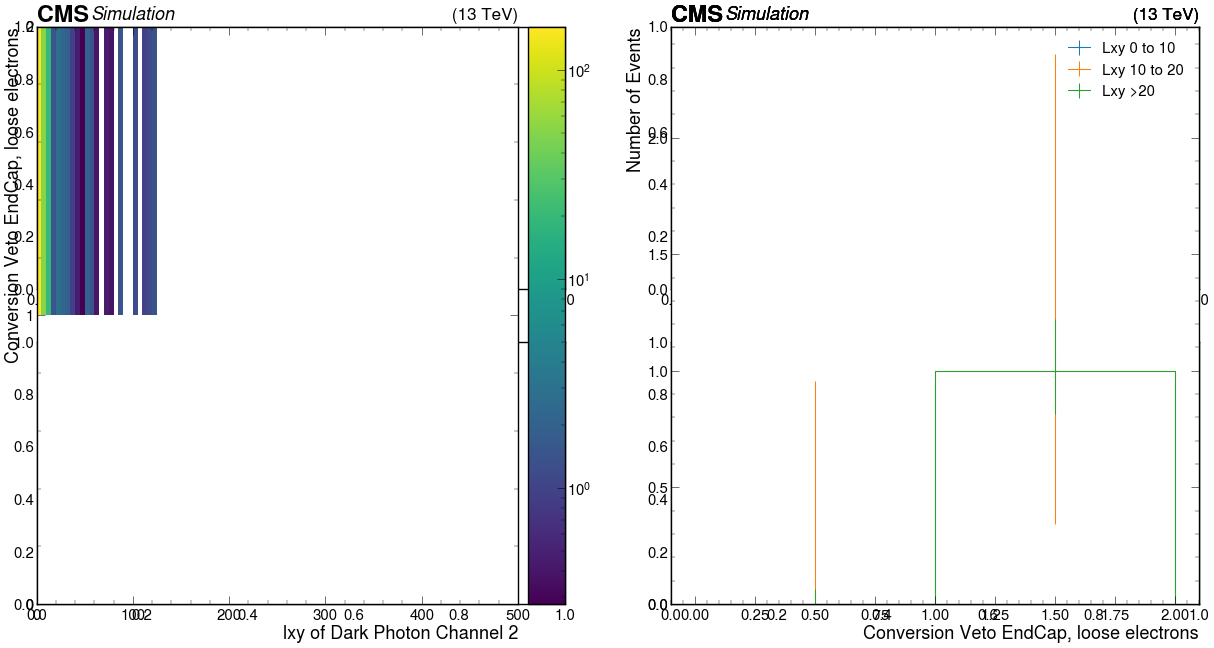

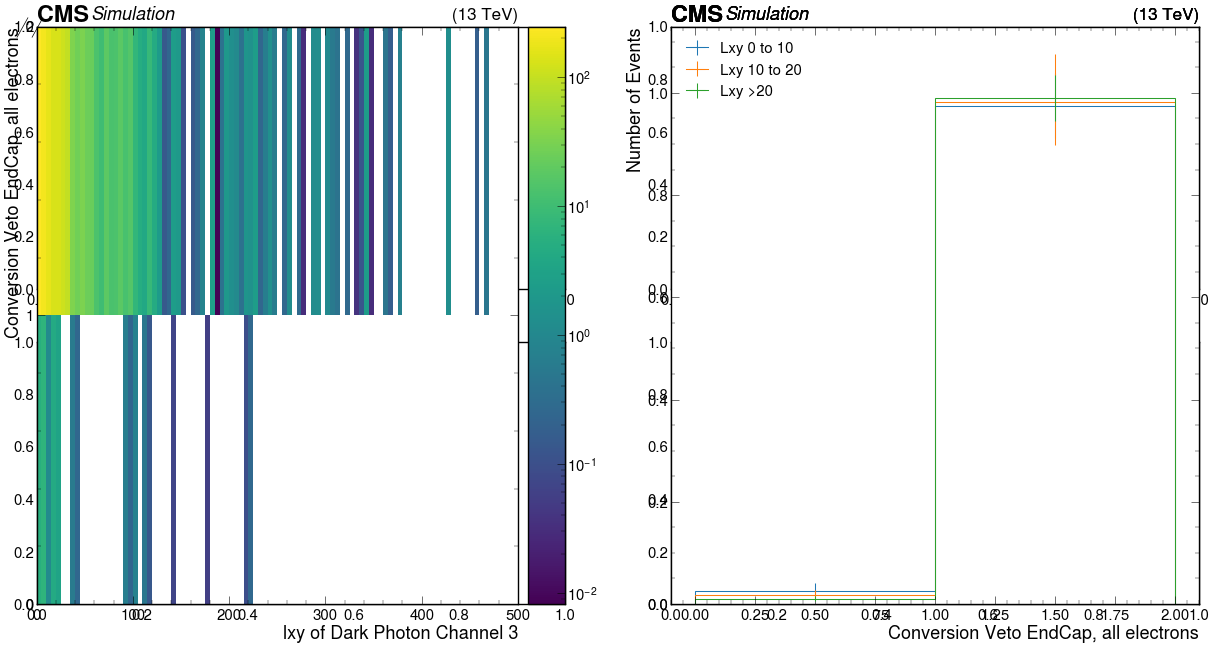

In [11]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
print(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Conversion Veto EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Conversion Veto EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto EndCap, all electrons")


(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:])

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 0     │                                                       │
[    0, 0.005) 918.4 │██████████████████████████████████████████████████████ │
[0.005,  0.01) 10.88 │▋                                                      │
[ 0.01, 0.015) 28.64 │█▋                                                     │
[0.015,  0.02) 25    │█▌                                                     │
[ 0.02, 0.025) 40.93 │██▍                                                    │
[0.025,  0.03) 36.46 │██▏                                                    │
[ 0.03, 0.035) 29.14 │█▊                                                     │
[0.035,  0.04) 25.42 │█▌                                                     │
[ 0.04, 0.045) 20.32 │█▎                                                     │
[0.045,  0.05) 19.5  │█▏                                                     │
[ 0.05, 0.055) 21.11 │█▎                            

Text(0, 1, 'H/E')

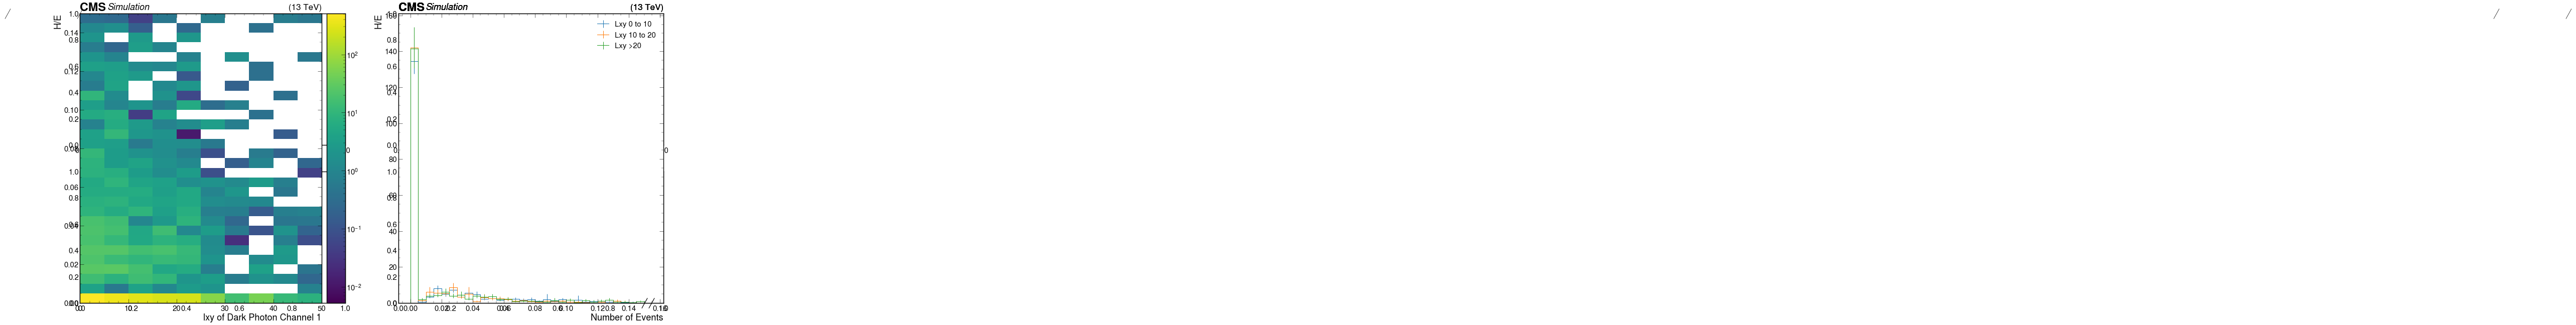

In [12]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   2) 632.1 │█████████████████████████████████████████████████████████ │
[   2,   3) 0     │                                                          │
[   3,   4) 0     │                                                          │
[   4,   5) 0     │                                                          │
[   5,   6) 0     │                                                          │
[   6,   7) 0     │                                                          │
[   7,   8) 0     │                                                          │
[   8,   9) 0     │                                                          │
[   9,  10) 0     │                                                          │
[  10, inf) 0     │                                                          │
                  └──────────────────────────────────────────────────────────┘
                   ┌────────────────────────────────

Hist(Regular(10, 0, 10, name='electron_GsfEleMissingHitsCut'), storage=Weight()) # Sum: WeightedSum(value=632.081, variance=1304.52)

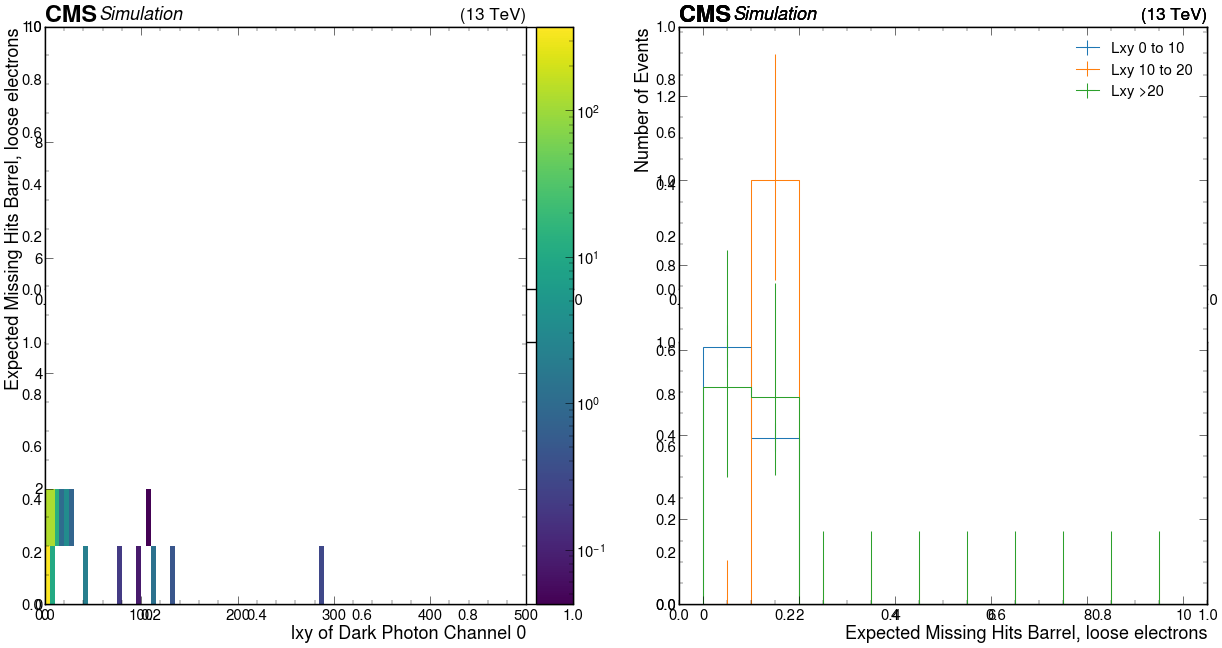

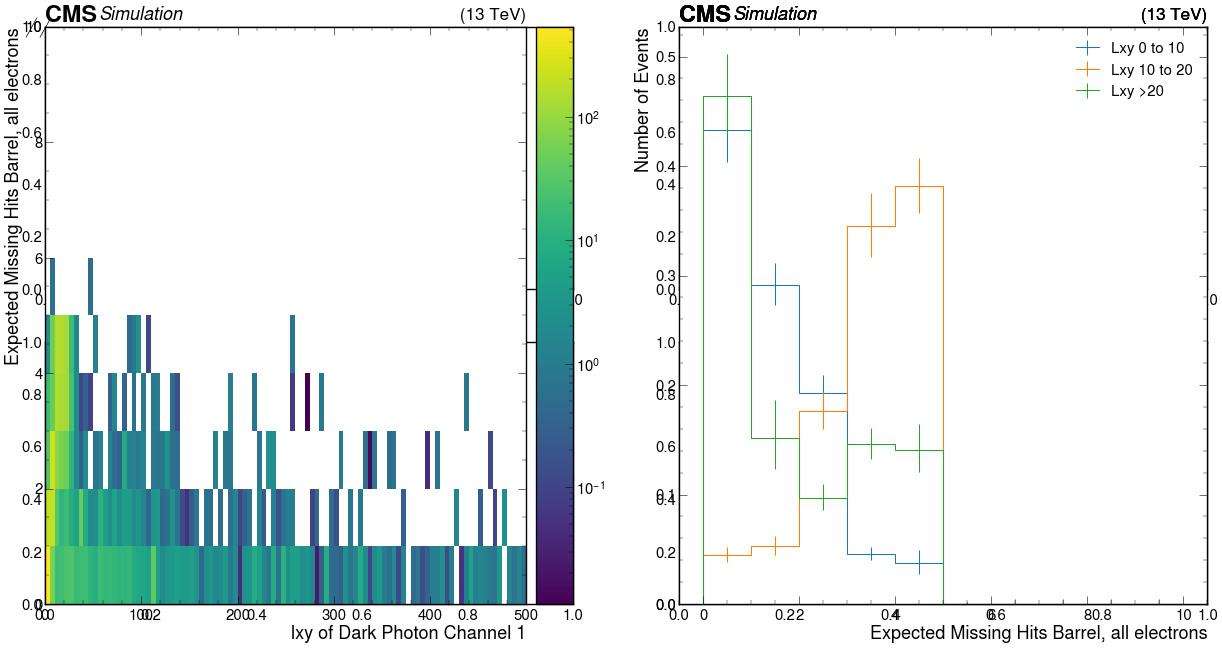

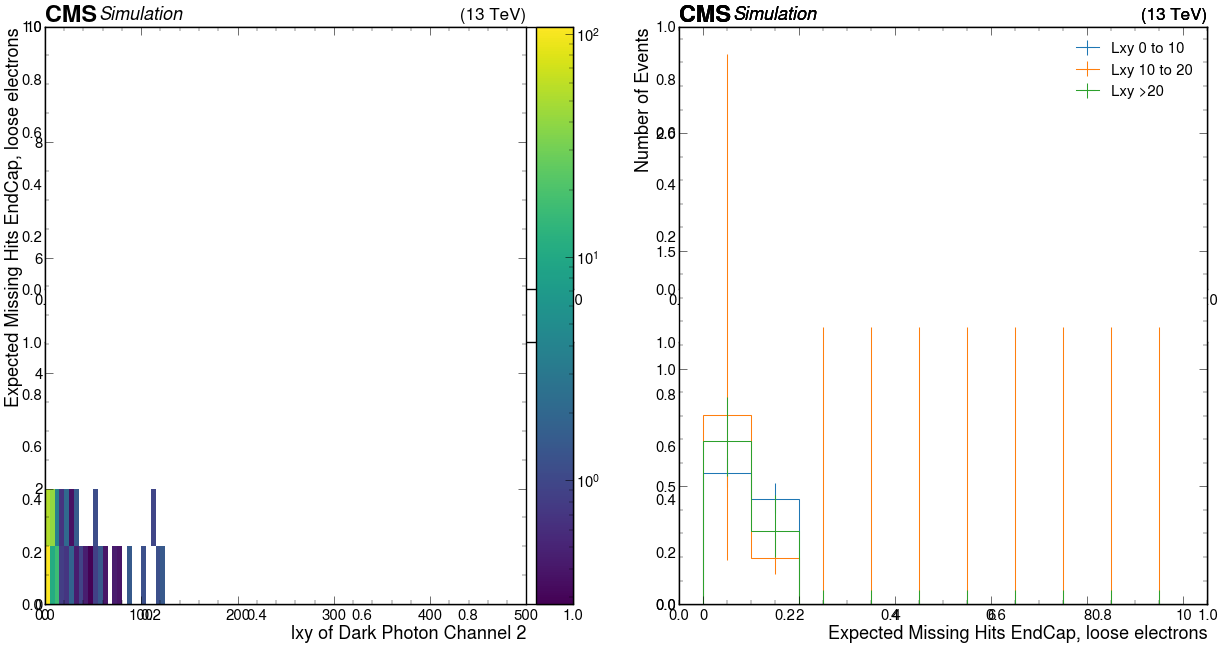

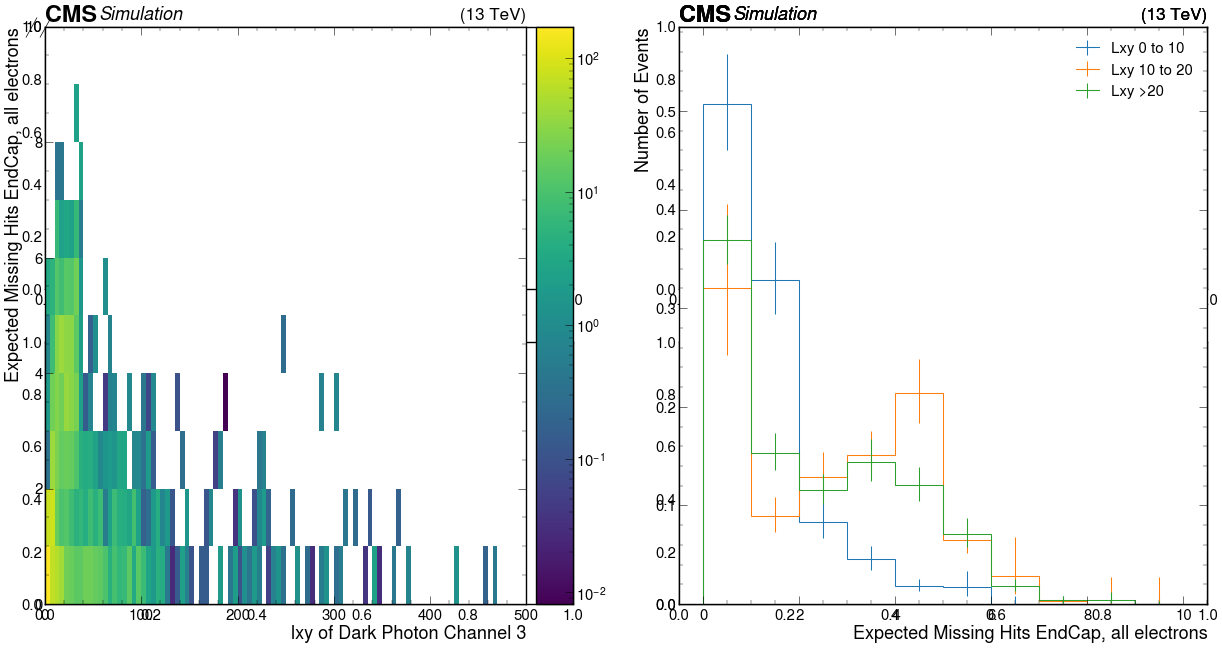

In [13]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
hists = out[sample]["hists"]
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
print(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Expected Missing Hits EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Expected Missing Hits EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits EndCap, all electrons")


(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:])

# Percentages Failed

In [14]:
binnumdict = {
    "electron_GsfEleDEtaInSeedCut2d": 17,
    "electron_GsfEleDPhiInCut2d" : 32,
    "electron_GsfEleEInverseMinusPInverseCut2d" : 25 ,
    "electron_GsfEleFull5x5SigmaIEtaIEtaCut2d" : 13 ,
    "electron_GsfEleConversionVetoCut2d" : 1,
    "electron_GsfEleMissingHitsCut2d" : 3 ,
}
#binnum come from the bin number assigned in hist.py (about half), and are specifically determined from the analysis note number for each ID variable

lxy = [0,2,3,4,5,6,7,8,9,10,102]
#able to change Lxy
hists =  output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]
for histname, binnum in binnumdict.items() : 
    values = output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print()
    print(histname)
    for i in range(0,len(lxy)-1):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        if histname == "electron_GsfEleConversionVetoCut2d" :
            fail = values[lxy[i]:lxy[i+1],binnum].sum()
        else: 
            fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)


electron_GsfEleDEtaInSeedCut2d
779.1646366522182 35.72904130467214 4.585557355142116
595.8010414060554 70.28197513014311 11.796215556166498
444.22798719489947 45.41951151145622 10.224369652677687
375.11846420541406 41.78106776019558 11.138099493102093
342.0917999576777 47.283023320138454 13.821735372197793
90.56470197346061 34.67234486807138 38.28461211988737
27.033474273979664 21.241675913333893 78.57545685047035
63.31647169776261 54.088707791641355 85.42596632647277
28.26319143548608 19.39052227512002 68.60698063550635
531.6978264362551 349.62472686590627 65.75628288896579

electron_GsfEleDPhiInCut2d
779.1646366522182 29.663988983491436 3.8071528901705043
595.8010414060554 59.88743017055094 10.051581989386948
444.22798719489947 42.718900779262185 9.616436156806078
375.11846420541406 31.35004968661815 8.357373117589576
342.0917999576777 34.704302188940346 10.144733721543114
90.56470197346061 26.52364914305508 29.286961216774788
27.033474273979664 18.687204897403717 69.12616820173417
